In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
# Getting the boss material data from Genshin Api
r = requests.get('https://api.genshin.dev/materials/boss-material')
if r.status_code == 200:
    data = r.json()
else:
    print("There was an error")

In [4]:
# Creating the data frame to hold the data
df = pd.DataFrame(data)
df

,hurricane-seed,hoarfrost-core,lightning-prism,basalt-pillar,cleansing-heart,everflame-seed,juvenile-jade,crystalline-bloom,marionette-core,perpetual-heart,smoldering-pearl,dew-of-repudiation,storm-beads,riftborn-regalia,dragonheir-s-false-fin
name,Hurricane Seed,Hoarfrost Core,Lightning Prism,Basalt Pillar,Cleansing Heart,Everflame Seed,Juvenile Jade,Crystalline Bloom,Marionette Core,Perpetual Heart,Smoldering Pearl,Dew of Repudiation,Storm Beads,Riftborn Regalia,Dragonheir's False Fin
source,Anemo Hypostasis,Cryo Regisvine,Electro Hypostasis,Geo Hypostasis,Oceanid,Pyro Regisvine,Primo Geovishap,Cryo Hypostasis,Maguu Kenki,Perpetual Mechanical Array,Pyro Hypostasis,Hydro Hypostasis,Thunder Manifestation,Golden Wolflord,Coral Defenders
characters,"[jean, sucrose, venti]","[chongyun, diona, ganyu, kaeya, qiqi, rosaria]","[beidou, fischl, keqing, lisa, razor]","[albedo, ningguang, noelle, zhongli]","[barbara, mona, tartaglia, xingqiu]","[amber, bennett, diluc, klee, xiangling, Xinyan]","[hu-tao, xiao, yanfei]","[aloy, eula]","[kazuha, sayu]","[gorou, ayaka]","[thoma, yoimiya]",[kokomi],"[sara, raiden]","[arataki-itto, yun-jin]","[shenhe, yae-miko]"


In [5]:
# Converting the DataFrame to a dictionary to add a new row
data_dict = df.to_dict()
# The base url to request another part of the Genshin Api
char_url = "https://api.genshin.dev/characters/"
count = 0
# Nested for loop to cross reference separate parts of the API data for character rarity
for x in data_dict:
    count = 0
    for i in data_dict[x]['characters']:
        group = requests.get(char_url + i)
        if group.status_code == 200:
            character = group.json()
        else:
            print("There was an error")
        if character['rarity'] == 5:
            count+=0
        elif character['rarity'] == 4:
            count+=1
    # Creating/filling new row with the ratio of 4-stars to 5-stars
    data_dict[x]["average"] = count/len(data_dict[x]['characters'])   


In [6]:
# Sorting the dictionary in descending order
sort = sorted(data_dict.items(), key = lambda x: x[1]['average'], reverse = True)
result = {}
# Fixing the sorted dictionary as the keys(Boss material names) became a tuple with the rest of the material data
for section in sort:
    result[section[0]] = section[1]
# Converting the dictionary back to a DataFrame    
actual_df = pd.DataFrame.from_dict(result)
# Deleting the first row(Boss material name) as it appears twice as the column names and the first row
actual_df = actual_df.drop('name')
actual_df

,lightning-prism,hoarfrost-core,everflame-seed,basalt-pillar,cleansing-heart,marionette-core,perpetual-heart,smoldering-pearl,storm-beads,riftborn-regalia,hurricane-seed,juvenile-jade,crystalline-bloom,dew-of-repudiation,dragonheir-s-false-fin
source,Electro Hypostasis,Cryo Regisvine,Pyro Regisvine,Geo Hypostasis,Oceanid,Maguu Kenki,Perpetual Mechanical Array,Pyro Hypostasis,Thunder Manifestation,Golden Wolflord,Anemo Hypostasis,Primo Geovishap,Cryo Hypostasis,Hydro Hypostasis,Coral Defenders
characters,"[beidou, fischl, keqing, lisa, razor]","[chongyun, diona, ganyu, kaeya, qiqi, rosaria]","[amber, bennett, diluc, klee, xiangling, Xinyan]","[albedo, ningguang, noelle, zhongli]","[barbara, mona, tartaglia, xingqiu]","[kazuha, sayu]","[gorou, ayaka]","[thoma, yoimiya]","[sara, raiden]","[arataki-itto, yun-jin]","[jean, sucrose, venti]","[hu-tao, xiao, yanfei]","[aloy, eula]",[kokomi],"[shenhe, yae-miko]"
average,0.8,0.666667,0.666667,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.333333,0.333333,0.0,0.0,0.0


In [11]:
first_5 = actual_df.iloc[:, :5]
print(first_5)

                                  lightning-prism  \
source                         Electro Hypostasis   
characters  [beidou, fischl, keqing, lisa, razor]   
average                                       0.8   

                                            hoarfrost-core  \
source                                      Cryo Regisvine   
characters  [chongyun, diona, ganyu, kaeya, qiqi, rosaria]   
average                                           0.666667   

                                              everflame-seed  \
source                                        Pyro Regisvine   
characters  [amber, bennett, diluc, klee, xiangling, Xinyan]   
average                                             0.666667   

                                   basalt-pillar  \
source                            Geo Hypostasis   
characters  [albedo, ningguang, noelle, zhongli]   
average                                      0.5   

                                cleansing-heart  
source                

<Axes: xlabel='Boss Material', ylabel='4 Star to 5 Star Ratio'>

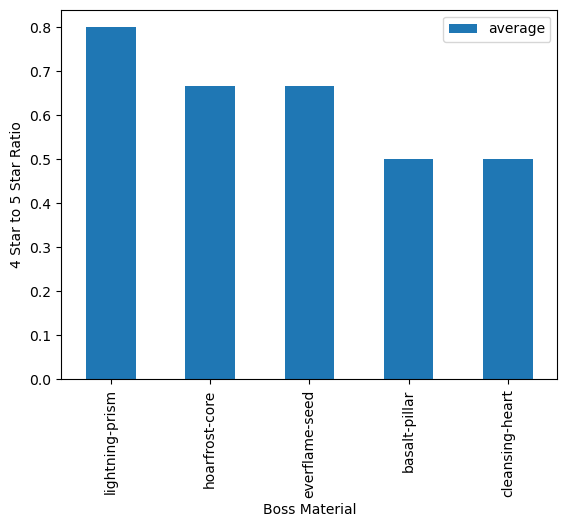

In [8]:
# Creating bar graph of top 5 boss materials
first_5.transpose().plot.bar(xlabel='Boss Material', ylabel = "4 Star to 5 Star Ratio")

In [9]:
last_5 = actual_df.iloc[:, -5:]
print(last_5)

                    hurricane-seed           juvenile-jade crystalline-bloom  \
source            Anemo Hypostasis         Primo Geovishap   Cryo Hypostasis   
characters  [jean, sucrose, venti]  [hu-tao, xiao, yanfei]      [aloy, eula]   
average                   0.333333                0.333333               0.0   

           dew-of-repudiation dragonheir-s-false-fin  
source       Hydro Hypostasis        Coral Defenders  
characters           [kokomi]     [shenhe, yae-miko]  
average                   0.0                    0.0  


<Axes: xlabel='Boss Material', ylabel='4 Star to 5 Star Ratio'>

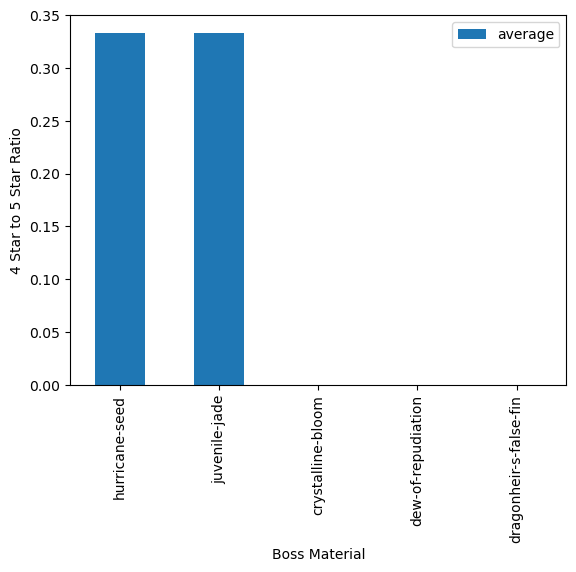

In [10]:
# Creating bar graph of last 5 boss materials
last_5.transpose().plot.bar(xlabel='Boss Material', ylabel = "4 Star to 5 Star Ratio")